In [70]:
import pandas as pd
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv')
 
features = list(df.columns)
features = features[0:8]
 
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [72]:
X = df[features]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [73]:
lr = LogisticRegression(random_state=1, max_iter=400)
 
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
 
cnf_matrix

array([[139,  10],
       [ 40,  42]])

Text(0.5, 1.0, 'Confusion Matrix')

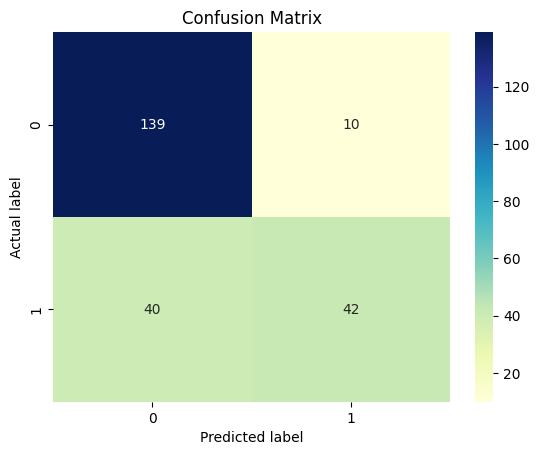

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
 
class_names = [0, 1]
 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
 
sns.heatmap(pd.DataFrame(cnf_matrix),
            annot=True,
            cmap='YlGnBu',
            fmt='g')
 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
 
plt.title('Confusion Matrix')

In [75]:
from sklearn.metrics import classification_report
 
target_names = ['without diabetes', 'with diabetes']
 
output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
 
output_report

{'without diabetes': {'precision': 0.776536312849162,
  'recall': 0.9328859060402684,
  'f1-score': 0.8475609756097561,
  'support': 149.0},
 'with diabetes': {'precision': 0.8076923076923077,
  'recall': 0.5121951219512195,
  'f1-score': 0.6268656716417911,
  'support': 82.0},
 'accuracy': 0.7835497835497836,
 'macro avg': {'precision': 0.7921143102707349,
  'recall': 0.7225405139957439,
  'f1-score': 0.7372133236257736,
  'support': 231.0},
 'weighted avg': {'precision': 0.787596016646296,
  'recall': 0.7835497835497836,
  'f1-score': 0.7692189196557597,
  'support': 231.0}}

In [76]:
# Precision: Percentage of correct positive predictions relative to total positive predictions.
# Recall: Percentage of correct positive predictions relative to total actual positives.
# F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model

# https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=The%20area%20under%20the%20ROC,curve%20(AUC)%20of%201.0


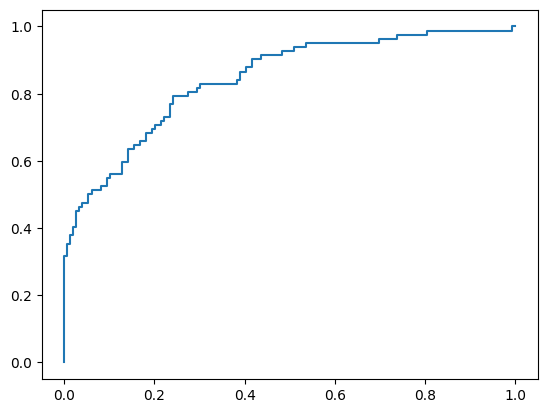

In [77]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
 
plt.plot(fpr, tpr, label=f'auc {auc}')
 
plt.show()

In [84]:
# test size was 0.25, suggested change to 0.7922077922077922
# this seems to help this section of code to run OK

import itertools
 
combinations = []
 
for i in range(1, 9):
    combs = itertools.combinations(features, i)
    combinations.extend(combs)
 
accuracy = 0
best_X = 0

y = df['Outcome']
 
for features in combinations:
    X = df[list(features)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7922077922077922, random_state=1)
 
    lr_iter = LogisticRegression(random_state=1, max_iter=400)
 
    lr_iter.fit(X_train, y_train)
    y_pred = lr_iter.predict(X_test)
 
    output_report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
 
    acc = output_report['accuracy']
 
    if acc > accuracy:
        accuracy = acc
        best_X = list(features)
 
print(best_X)
print(accuracy)

['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
0.7947454844006568
